In [147]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [148]:
sacog = pd.read_excel("sacog_recoded_for_qianhua.xlsx")

#### solve inconsistency in recoding

In [149]:
sacog = sacog.replace("Never ", "Never")

### Part 1 Explore adoption, opt-out and penetration rate

In [150]:
never = ["Never", "Almost never"]
never_and_noRes = ["Never", "Almost never", 'No Response']

def count_(cat):
    past_year_freq = 'PastYear-ECommerce-Frequency-' + cat
    may_freq = 'May-ECommerce-Frequency-' + cat
    may_order = 'May-ECommerce-Orders-' + cat
    oldUser = sacog[~sacog[past_year_freq].isin(never_and_noRes)]
    pastNever = sacog[sacog[past_year_freq].isin(never)]
    adopter = pastNever[(pastNever[may_order] > 0) | (~pastNever[may_freq].isin(never_and_noRes))]
    NonAdopter = pastNever[(pastNever[may_order] == 0) & pastNever[may_freq].isin(never)]
    quiter = oldUser[(oldUser[may_order] == 0) & (oldUser[may_freq].isin(never))]
    keeper = oldUser[(oldUser[may_order] > 0) | (~oldUser[may_freq].isin(never_and_noRes))]
    nowUser = sacog[(sacog[may_order] > 0) | (~sacog[may_freq].isin(never_and_noRes))]
    return [len(oldUser),
           len(pastNever), 
           len(adopter),
           len(NonAdopter),
           len(quiter),
           len(keeper),
           len(nowUser),
           oldUser,
           pastNever,
           adopter,
           NonAdopter,
           quiter,
           keeper,
           nowUser
           ]

dict_ = {}
cat_ = ['PreparedFood', 'Groceries', 'OtherFood', 'PaperCleaning', 'Clothing', 'HomeOffice', 'Medication', 'ChildcareItems', 'Other']
for cat in cat_:
    dict_[cat] = count_(cat)

#### 1.1 Adoption

In [151]:
print(tabulate([[cat, 
                 dict_[cat][1], 
                 dict_[cat][2], 
                 dict_[cat][3], 
                 "{:.1%}".format(dict_[cat][2]/dict_[cat][1])] for cat in cat_], headers=['Category', 'Never Used(19/20)', 'Adopter', 'NonAdopter', 'Adoption Rate(May, 2020)']))
    

Category          Never Used(19/20)    Adopter    NonAdopter  Adoption Rate(May, 2020)
--------------  -------------------  ---------  ------------  --------------------------
PreparedFood                    123         49            43  39.8%
Groceries                       196         52           103  26.5%
OtherFood                       207         26           124  12.6%
PaperCleaning                   166         42            78  25.3%
Clothing                         62         15            27  24.2%
HomeOffice                      146         26            76  17.8%
Medication                      129         18            70  14.0%
ChildcareItems                  217          4           146  1.8%
Other                            68         14            21  20.6%


#### 1.2 Opt-out

In [152]:
print(tabulate([[cat, 
                 dict_[cat][0], 
                 dict_[cat][4], 
                 dict_[cat][5], 
                 "{:.1%}".format(dict_[cat][4]/dict_[cat][0])] for cat in cat_], headers=['Category', 'Old User(19/20)', 'Quit', 'Maintain', 'Quit Rate(May, 2020)']))
    

Category          Old User(19/20)    Quit    Maintain  Quit Rate(May, 2020)
--------------  -----------------  ------  ----------  ----------------------
PreparedFood                  171      15         125  8.8%
Groceries                      96      11          61  11.5%
OtherFood                      83      18          39  21.7%
PaperCleaning                 120      23          63  19.2%
Clothing                      225      26         151  11.6%
HomeOffice                    139      21          80  15.1%
Medication                    154      10         110  6.5%
ChildcareItems                 64       7          44  10.9%
Other                          52       2          34  3.8%


#### 1.3 Penetration

In [153]:
print(tabulate([[cat, 
                 dict_[cat][0], 
                 "{:.1%}".format(dict_[cat][0]/327), 
                 dict_[cat][6], 
                 "{:.1%}".format(dict_[cat][6]/327),
                "{:.1%}".format(dict_[cat][6]/327 - dict_[cat][0]/327)] for cat in cat_], headers=['Category', 'Old User', 'Penetration Rate(19/20)', 'Present User', 'Penetration Rate(May, 2020)', 'Net Change']))

Category          Old User  Penetration Rate(19/20)      Present User  Penetration Rate(May, 2020)    Net Change
--------------  ----------  -------------------------  --------------  -----------------------------  ------------
PreparedFood           171  52.3%                                 181  55.4%                          3.1%
Groceries               96  29.4%                                 115  35.2%                          5.8%
OtherFood               83  25.4%                                  68  20.8%                          -4.6%
PaperCleaning          120  36.7%                                 112  34.3%                          -2.4%
Clothing               225  68.8%                                 183  56.0%                          -12.8%
HomeOffice             139  42.5%                                 117  35.8%                          -6.7%
Medication             154  47.1%                                 137  41.9%                          -5.2%
ChildcareItems   

### Part 2 Explore Attitude/Perception

SIDE NOTE: agree_dict = {'Strongly agree':5,'Agree':4,'Neither agree nor disagree':3,'Disagree':2,'Strongly disagree':1}

1) Why people adopt? (Food + Grocery)
<br>
Due to safety concern (dimension of safety concern: exposure to crowds/delivery)or other factors? 
If they choose to pick up, their safety concerns about exposure to the crowd might not be that high and they are more likely to continue? (look at excuse to get out (conditional on) & intention to continue)

How's their perception towards ease of obtaining items during the surveyed week?

2) Why not adopt? 
<br>OnlineEase? Trust towards delivery workers? Social/travel desire?(Excuse to get out)

3) Why quit? 
<br>Desire to travel? Trust towards workers?

In [154]:
### Identify the population for prepared food and grocery shopping.

### 1) Prepared Food
oldUserF = count_('PreparedFood')[7]
pastNeverF = count_('PreparedFood')[8]
adopterF = count_('PreparedFood')[9]
NonAdopterF = count_('PreparedFood')[10]
quiterF = count_('PreparedFood')[11]
keeperF = count_('PreparedFood')[12]
nowUserF = count_('PreparedFood')[13]

### 2) Grocery
oldUserG = count_('Groceries')[7]
pastNeverG = count_('Groceries')[8]
adopterG = count_('Groceries')[9]
NonAdopterG = count_('Groceries')[10]
quiterG = count_('Groceries')[11]
keeperG = count_('Groceries')[12]
nowUserG = count_('Groceries')[13]

In [155]:
def show_dist(cat,attitude, mask):
    adopter = adopterG
    NonAdopter = NonAdopterG
    if cat == 'F':
        adopter = adopterF
        NonAdopter = NonAdopterF
    display(adopter[~adopter[attitude].isin([mask])][attitude].describe())
    display(NonAdopter[~NonAdopter[attitude].isin([mask])][attitude].describe())
    sns.distplot(adopter[~adopter[attitude].isin([mask])][attitude], bins = [1,2,3,4,5], label="Adopter")
    sns.distplot(NonAdopter[~NonAdopter[attitude].isin([mask])][attitude], bins = [1,2,3,4,5], label = "NonAdopter")
    plt.legend()
    plt.xlim([0.5, 5.5])
    

In [168]:
# t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
 
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p

def independent_ttest_2(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # Sample size
    n1, n2 = len(data1), len(data2)
    df = n1 + n2 - 2
    # calculate standard errors
    se_p_2 = (sum((data1 - mean1)**2.0) + sum((data2 - mean2)**2.0))/df
    # standard error on the difference between the samples
    sed = sqrt(se_p_2)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / (sed*sqrt(1/n1 + 1/n2))
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

In [172]:
def compare_mean(cat, att_dict):
    adopter = adopterG
    NonAdopter = NonAdopterG
    if cat == 'F':
        adopter = adopterF
        NonAdopter = NonAdopterF
    print(tabulate([[att, 
                     adopter[~adopter[att].isin([att_dict[att]])][att].mean(), 
                     NonAdopter[~NonAdopter[att].isin([att_dict[att]])][att].mean(),
                     independent_ttest_2(adopter[~adopter[att].isin([att_dict[att]])][att], NonAdopter[~NonAdopter[att].isin([att_dict[att]])][att], 0.05)[3]
                    ] for att in att_dict.keys()], headers=['Attitude', 'Adopter', 'NonAdopter', 'P-value']))
    

In [157]:
attitudeF = {'COVID-PPEReducesContraction': -9998,
            'COVID-PPEReducesTransmission': -9998,
            'COVID-AbleSocialDistance': -9998,
            'Trust-FoodDeliveryCompanies': -9998,
            'Trust-FoodDeliveryDrivers': -9998,
            'Behavior-PickupExcuseToGetOut': -9998,
            'Behavior-NotMindRestaurantOnline': -9998,
            'ECommerce-Food-HardToKnowExactly': -9998,
            'ECommerce-Food-WorryAboutTheft': -9998,
            'Attitude-SociallyIsolated': -9998,
            'Attitude-Stressed': -9998,
            'Attitude-HaveEnoughFood': -9998,
            'Online-Ease': 997
            }
attitudeG = {'COVID-PPEReducesContraction': -9998,
            'COVID-PPEReducesTransmission': -9998,
            'COVID-AbleSocialDistance': -9998,
            'Trust-GroceryDeliveryCompanies': -9998,
            'Trust-GroceryDeliveryDrivers': -9998,
            'Behavior-GroceryExcuseToGetOut': -9998,
            'Behavior-NotMindGroceriesOnline': -9998,
            'Behavior-InPersonIsChore': -9998,
            'ECommerce-Food-HardToKnowExactly': -9998,
            'ECommerce-Food-WorryAboutTheft': -9998,
            'Attitude-SociallyIsolated': -9998,
            'Attitude-Stressed': -9998,
            'Attitude-HaveEnoughFood': -9998,
            'Online-Ease': 997
            }

In [173]:
compare_mean('F', attitudeF)

Attitude                            Adopter    NonAdopter      P-value
--------------------------------  ---------  ------------  -----------
COVID-PPEReducesContraction         4.12245       3.7907   0.187111
COVID-PPEReducesTransmission        4.53061       4.16279  0.0818697
COVID-AbleSocialDistance            4.42857       4.39535  0.797289
Trust-FoodDeliveryCompanies         3.26531       3.2439   0.909411
Trust-FoodDeliveryDrivers           3.73469       3.4878   0.109463
Behavior-PickupExcuseToGetOut       2.65306       1.81395  0.000139257
Behavior-NotMindRestaurantOnline    3.5102        2.62791  8.24738e-05
ECommerce-Food-HardToKnowExactly    3.93878       3.97674  0.836993
ECommerce-Food-WorryAboutTheft      2.5102        2.7907   0.217967
Attitude-SociallyIsolated           2.89796       2.81395  0.718203
Attitude-Stressed                   3.08163       2.86047  0.342759
Attitude-HaveEnoughFood             4.57143       4.53488  0.739266
Online-Ease                        

In [174]:
compare_mean('G', attitudeG)

Attitude                            Adopter    NonAdopter      P-value
--------------------------------  ---------  ------------  -----------
COVID-PPEReducesContraction         3.94231       4.09709  0.402681
COVID-PPEReducesTransmission        4.57692       4.40777  0.246053
COVID-AbleSocialDistance            4.40385       4.3301   0.526329
Trust-GroceryDeliveryCompanies      3.33333       3.36634  0.818503
Trust-GroceryDeliveryDrivers        3.76923       3.71     0.622144
Behavior-GroceryExcuseToGetOut      3.42308       3.14563  0.173362
Behavior-NotMindGroceriesOnline     3.38462       2.40777  2.82327e-06
Behavior-InPersonIsChore            2.88462       2.61165  0.172585
ECommerce-Food-HardToKnowExactly    4.17308       3.87379  0.03686
ECommerce-Food-WorryAboutTheft      2.34615       2.86408  0.00537946
Attitude-SociallyIsolated           3.17308       3.01942  0.422995
Attitude-Stressed                   3.32692       3.14563  0.343263
Attitude-HaveEnoughFood             4.

In [161]:
sacog['Online-Ease'].std()

77.53019275927926

In [109]:
list(sacog.columns)

['Unnamed: 0',
 'Duration (in seconds)',
 'Response ID',
 'May-WorkingHours',
 'May-TelecommutingDays',
 'May-Trips-Commuting',
 'May-Trips-Medical',
 'May-Trips-Gym',
 'May-Trips-ToSchool',
 'May-Trips-FromSchool',
 'May-Trips-Bar',
 'May-Trips-MovieTheater',
 'May-Trips-Friends',
 'May-Trips-Family',
 'May-Trips-Other',
 'May-Trips-OtherType',
 'CommutingFollowup',
 'May-TripDistance-Commuting',
 'May-TripDistance-Medical',
 'May-TripDistance-Gym',
 'May-TripDistance-ToSchool',
 'May-TripDistance-FromSchool',
 'May-TripDistance-Bar',
 'May-TripDistance-MovieTheater',
 'May-TripDistance-Friends',
 'May-TripDistance-Family',
 'May-TripDistance-Other',
 'May-TripDistance-OtherType',
 'May-TripMode-Commuting',
 'May-TripMode-Medical',
 'May-TripMode-Gym',
 'May-TripMode-ToSchool',
 'May-TripMode-FromSchool',
 'May-TripMode-Bar',
 'May-TripMode-MovieTheater',
 'May-TripMode-Friends',
 'May-TripMode-Family',
 'May-TripMode-Other',
 'May-TripMode-OtherType',
 'LivingInSamePlace',
 'JanFeb-W

### Online Ease

count    49.000000
mean      4.122449
std       0.725507
min       2.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Online-Ease, dtype: float64

count    42.000000
mean      4.000000
std       0.937043
min       1.000000
25%       3.250000
50%       4.000000
75%       5.000000
max       5.000000
Name: Online-Ease, dtype: float64

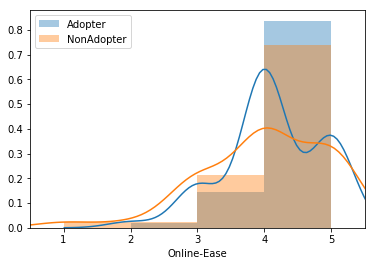

In [71]:
show_dist('F', 'Online-Ease', 997)

count    52.000000
mean      4.211538
std       0.666761
min       3.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Online-Ease, dtype: float64

count    102.000000
mean       4.088235
std        0.868627
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Online-Ease, dtype: float64

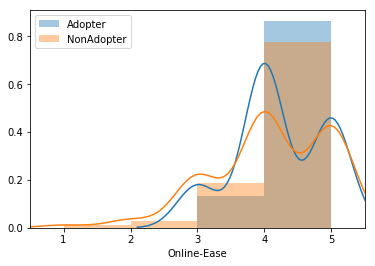

In [72]:
show_dist('G', 'Online-Ease', 997)

### Trust Delivery Company

count    49.000000
mean      3.265306
std       0.907733
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Trust-FoodDeliveryCompanies, dtype: float64

count    41.000000
mean      3.243902
std       0.859665
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: Trust-FoodDeliveryCompanies, dtype: float64

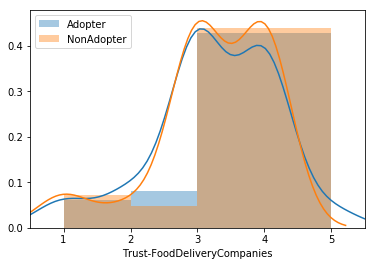

In [67]:
show_dist('F', 'Trust-FoodDeliveryCompanies', -9998)

count    51.000000
mean      3.333333
std       0.972968
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Trust-GroceryDeliveryCompanies, dtype: float64

count    101.000000
mean       3.366337
std        0.757928
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Trust-GroceryDeliveryCompanies, dtype: float64

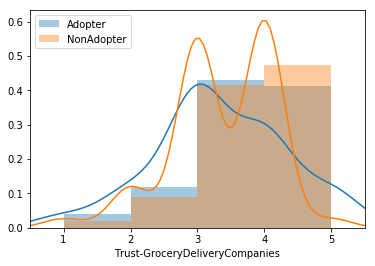

In [74]:
show_dist('G', 'Trust-GroceryDeliveryCompanies', -9998)

### Trust delivery drivers

count    49.000000
mean      3.734694
std       0.700461
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Trust-FoodDeliveryDrivers, dtype: float64

count    41.000000
mean      3.487805
std       0.745719
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Trust-FoodDeliveryDrivers, dtype: float64

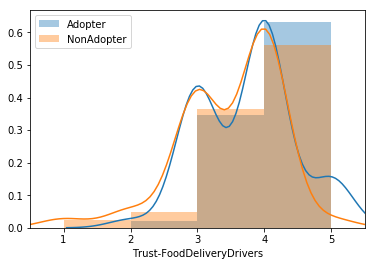

In [76]:
show_dist('F', 'Trust-FoodDeliveryDrivers', -9998)

count    52.000000
mean      3.769231
std       0.730710
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Trust-GroceryDeliveryDrivers, dtype: float64

count    100.000000
mean       3.710000
std        0.686007
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Trust-GroceryDeliveryDrivers, dtype: float64

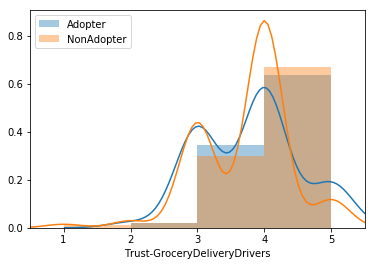

In [77]:
show_dist('G', 'Trust-GroceryDeliveryDrivers', -9998)

### Excuse to go out

count    49.000000
mean      2.653061
std       1.071429
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: Behavior-PickupExcuseToGetOut, dtype: float64

count    43.000000
mean      1.813953
std       0.932376
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: Behavior-PickupExcuseToGetOut, dtype: float64

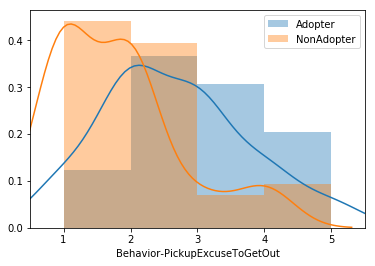

In [78]:
show_dist('F', 'Behavior-PickupExcuseToGetOut', -9998)

count    52.000000
mean      3.423077
std       1.273349
min       1.000000
25%       2.750000
50%       4.000000
75%       4.000000
max       5.000000
Name: Behavior-GroceryExcuseToGetOut, dtype: float64

count    103.000000
mean       3.145631
std        1.149661
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Behavior-GroceryExcuseToGetOut, dtype: float64

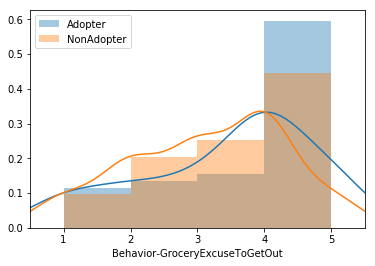

In [79]:
show_dist('G', 'Behavior-GroceryExcuseToGetOut', -9998)

count    49.00000
mean      2.55102
std       1.20867
min       1.00000
25%       2.00000
50%       2.00000
75%       4.00000
max       5.00000
Name: Behavior-InPersonIsChore, dtype: float64

count    43.00000
mean      2.27907
std       0.90831
min       1.00000
25%       2.00000
50%       2.00000
75%       3.00000
max       5.00000
Name: Behavior-InPersonIsChore, dtype: float64

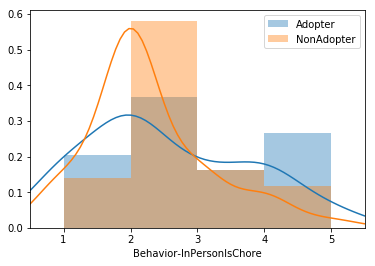

In [87]:
show_dist('F', 'Behavior-InPersonIsChore', -9998)

count    52.000000
mean      2.884615
std       1.352613
min       1.000000
25%       2.000000
50%       2.500000
75%       4.000000
max       5.000000
Name: Behavior-InPersonIsChore, dtype: float64

count    103.000000
mean       2.611650
std        1.068562
min        1.000000
25%        2.000000
50%        2.000000
75%        3.500000
max        5.000000
Name: Behavior-InPersonIsChore, dtype: float64

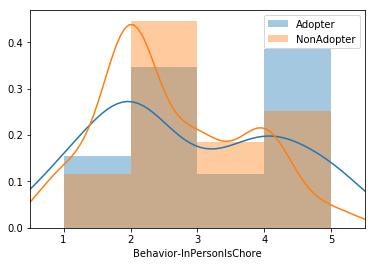

In [88]:
show_dist('G', 'Behavior-InPersonIsChore', -9998)

### COVID Related-Safety Concern

count    49.000000
mean      4.122449
std       1.111168
min       1.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: COVID-PPEReducesContraction, dtype: float64

count    43.000000
mean      3.790698
std       1.282819
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: COVID-PPEReducesContraction, dtype: float64

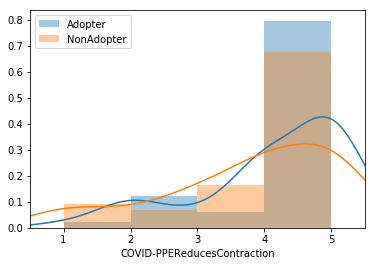

In [80]:
show_dist('F', 'COVID-PPEReducesContraction', -9998)

count    52.000000
mean      3.942308
std       1.161700
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: COVID-PPEReducesContraction, dtype: float64

count    103.000000
mean       4.097087
std        1.043322
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: COVID-PPEReducesContraction, dtype: float64

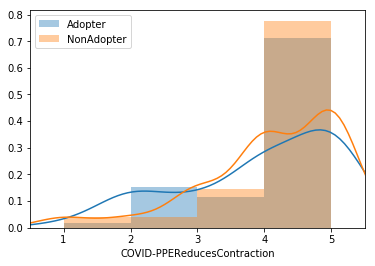

In [81]:
show_dist('G', 'COVID-PPEReducesContraction', -9998)

count    49.000000
mean      4.530612
std       0.892143
min       2.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: COVID-PPEReducesTransmission, dtype: float64

count    43.000000
mean      4.162791
std       1.111203
min       1.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: COVID-PPEReducesTransmission, dtype: float64

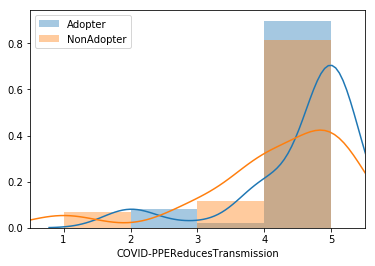

In [82]:
show_dist('F', 'COVID-PPEReducesTransmission', -9998)

count    52.000000
mean      4.576923
std       0.775764
min       2.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: COVID-PPEReducesTransmission, dtype: float64

count    103.000000
mean       4.407767
std        0.890438
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: COVID-PPEReducesTransmission, dtype: float64

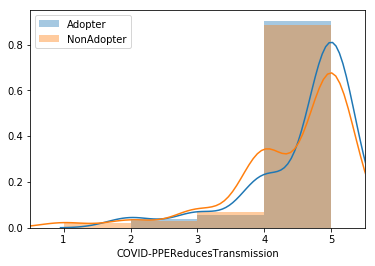

In [84]:
show_dist('G', 'COVID-PPEReducesTransmission', -9998)

count    49.000000
mean      4.428571
std       0.577350
min       3.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: COVID-AbleSocialDistance, dtype: float64

count    43.000000
mean      4.395349
std       0.659709
min       2.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: COVID-AbleSocialDistance, dtype: float64

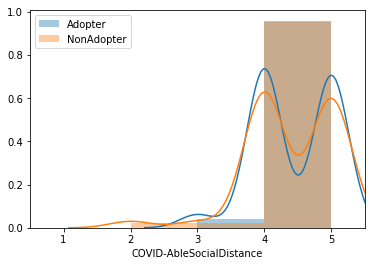

In [85]:
show_dist('F', 'COVID-AbleSocialDistance', -9998)

count    52.000000
mean      4.403846
std       0.693375
min       3.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: COVID-AbleSocialDistance, dtype: float64

count    103.000000
mean       4.330097
std        0.677196
min        2.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: COVID-AbleSocialDistance, dtype: float64

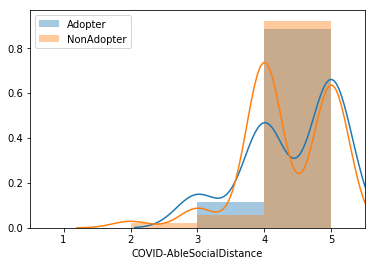

In [86]:
show_dist('G', 'COVID-AbleSocialDistance', -9998)

count    49.000000
mean      3.938776
std       0.875789
min       2.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: ECommerce-Food-HardToKnowExactly, dtype: float64

count    43.000000
mean      3.976744
std       0.886093
min       1.000000
25%       4.000000
50%       4.000000
75%       4.500000
max       5.000000
Name: ECommerce-Food-HardToKnowExactly, dtype: float64

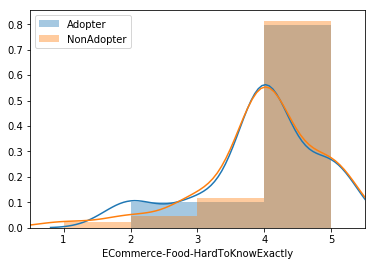

In [89]:
show_dist('F', 'ECommerce-Food-HardToKnowExactly', -9998)

### Mental Health

count    49.000000
mean      2.897959
std       1.084837
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Attitude-SociallyIsolated, dtype: float64

count    43.000000
mean      2.813953
std       1.139252
min       1.000000
25%       2.000000
50%       2.000000
75%       4.000000
max       5.000000
Name: Attitude-SociallyIsolated, dtype: float64

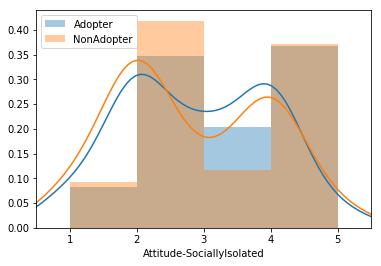

In [93]:
show_dist('F', 'Attitude-SociallyIsolated', -9998)

count    52.000000
mean      3.173077
std       1.115333
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Attitude-SociallyIsolated, dtype: float64

count    103.000000
mean       3.019417
std        1.128773
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Attitude-SociallyIsolated, dtype: float64

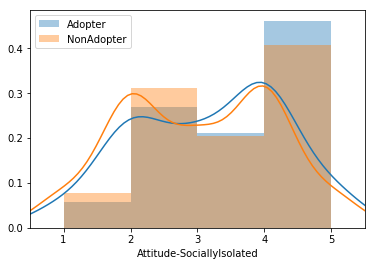

In [92]:
show_dist('G', 'Attitude-SociallyIsolated', -9998)

count    49.000000
mean      3.081633
std       1.114988
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Attitude-Stressed, dtype: float64

count    43.000000
mean      2.860465
std       1.103704
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Attitude-Stressed, dtype: float64

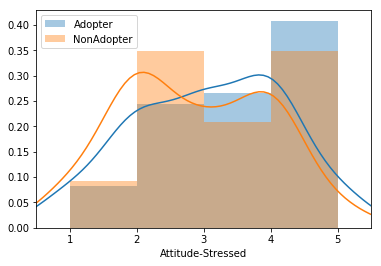

In [96]:
show_dist('F', 'Attitude-Stressed', -9998)

count    52.000000
mean      3.326923
std       1.166882
min       1.000000
25%       2.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Attitude-Stressed, dtype: float64

count    103.000000
mean       3.145631
std        1.097303
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Attitude-Stressed, dtype: float64

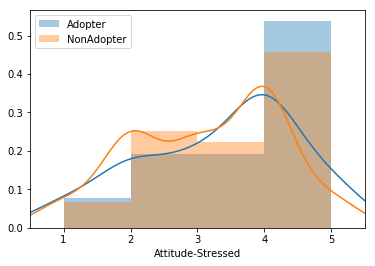

In [97]:
show_dist('G', 'Attitude-Stressed', -9998)

count    49.000000
mean      4.571429
std       0.540062
min       3.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Attitude-HaveEnoughFood, dtype: float64

count    43.000000
mean      4.534884
std       0.504685
min       4.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Attitude-HaveEnoughFood, dtype: float64

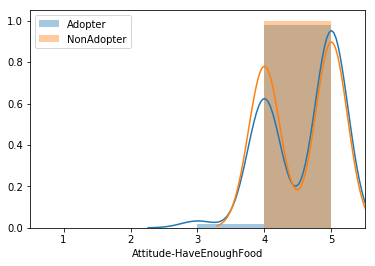

In [98]:
show_dist('F', 'Attitude-HaveEnoughFood', -9998)

count    52.000000
mean      4.557692
std       0.501506
min       4.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Attitude-HaveEnoughFood, dtype: float64

count    103.000000
mean       4.572816
std        0.516435
min        3.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Attitude-HaveEnoughFood, dtype: float64

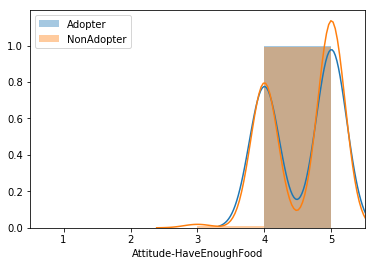

In [99]:
show_dist('G', 'Attitude-HaveEnoughFood', -9998)

In [44]:
list(sacog.columns)

['Unnamed: 0',
 'Duration (in seconds)',
 'Response ID',
 'May-WorkingHours',
 'May-TelecommutingDays',
 'May-Trips-Commuting',
 'May-Trips-Medical',
 'May-Trips-Gym',
 'May-Trips-ToSchool',
 'May-Trips-FromSchool',
 'May-Trips-Bar',
 'May-Trips-MovieTheater',
 'May-Trips-Friends',
 'May-Trips-Family',
 'May-Trips-Other',
 'May-Trips-OtherType',
 'CommutingFollowup',
 'May-TripDistance-Commuting',
 'May-TripDistance-Medical',
 'May-TripDistance-Gym',
 'May-TripDistance-ToSchool',
 'May-TripDistance-FromSchool',
 'May-TripDistance-Bar',
 'May-TripDistance-MovieTheater',
 'May-TripDistance-Friends',
 'May-TripDistance-Family',
 'May-TripDistance-Other',
 'May-TripDistance-OtherType',
 'May-TripMode-Commuting',
 'May-TripMode-Medical',
 'May-TripMode-Gym',
 'May-TripMode-ToSchool',
 'May-TripMode-FromSchool',
 'May-TripMode-Bar',
 'May-TripMode-MovieTheater',
 'May-TripMode-Friends',
 'May-TripMode-Family',
 'May-TripMode-Other',
 'May-TripMode-OtherType',
 'LivingInSamePlace',
 'JanFeb-W

## One possible thing to test adoption: TRIED & INTENTION TO CONTINUE

In [144]:
def compare_mean_int(cat, att_dict):
    No = sacog[sacog[cat].isin(['No'])]
    Since = sacog[sacog[cat].isin(['YesSinceSIP'])]
    Before = sacog[sacog[cat].isin(['YesBeforeSIP'])]
    NoHeard = sacog[sacog[cat].isin(['NeverHeard'])]
    print(tabulate([[att, 
                     No[~No[att].isin([att_dict[att]])][att].mean(), 
                     NoHeard[~NoHeard[att].isin([att_dict[att]])][att].mean(),
                     Since[~Since[att].isin([att_dict[att]])][att].mean(),
                     Before[~Before[att].isin([att_dict[att]])][att].mean()
                    ] for att in att_dict.keys()] + [['sample size', len(No), len(Since), len(Before), len(NoHeard)]], headers=['Attitude', 'No', 'NeverHeard', 'YesSinceSIP', 'YesBeforeSIP']))
    

In [145]:
attitudeInt = {'COVID-PPEReducesContraction': -9998,
            'COVID-PPEReducesTransmission': -9998,
            'COVID-AbleSocialDistance': -9998,
            'Trust-GroceryDeliveryCompanies': -9998,
            'Trust-GroceryDeliveryDrivers': -9998,
            'Behavior-PickupExcuseToGetOut': -9998,
            'ECommerce-Food-WorryAboutTheft': -9998,
            'Attitude-SociallyIsolated': -9998
            }

In [146]:
compare_mean_int('Tried-CurbsidePickup', attitudeInt)

Attitude                               No    NeverHeard    YesSinceSIP    YesBeforeSIP
------------------------------  ---------  ------------  -------------  --------------
COVID-PPEReducesContraction       4.00649       3.92308        4.05932         3.87179
COVID-PPEReducesTransmission      4.3961        4.38462        4.63559         4.23077
COVID-AbleSocialDistance          4.22078       4.61538        4.33051         4.30769
Trust-GroceryDeliveryCompanies    3.28758       3.38462        3.42735         3.17949
Trust-GroceryDeliveryDrivers      3.71053       3.69231        3.76271         3.87179
Behavior-PickupExcuseToGetOut     2.41558       2.53846        2.61864         2.74359
ECommerce-Food-WorryAboutTheft    2.83117       3.15385        2.66949         2.28205
Attitude-SociallyIsolated         3.03247       2.76923        3.0339          3.35897
sample size                     154           118             39              13


In [137]:
compare_mean_int('Tried-CurbsidePickup', {'DoInStage23-CurbsidePickup': -9998})

Attitude                         No    NeverHeard    YesSinceSIP    YesBeforeSIP
--------------------------  -------  ------------  -------------  --------------
DoInStage23-CurbsidePickup  2.48052       2.53846        3.88136         4.20513


No              154
YesSinceSIP     118
YesBeforeSIP     39
NeverHeard       13
No Response       3
Name: Tried-CurbsidePickup, dtype: int64

Tried-CurbsidePickup
NeverHeard      AxesSubplot(0.125,0.125;0.775x0.755)
No              AxesSubplot(0.125,0.125;0.775x0.755)
YesBeforeSIP    AxesSubplot(0.125,0.125;0.775x0.755)
YesSinceSIP     AxesSubplot(0.125,0.125;0.775x0.755)
Name: DoInStage23-CurbsidePickup, dtype: object

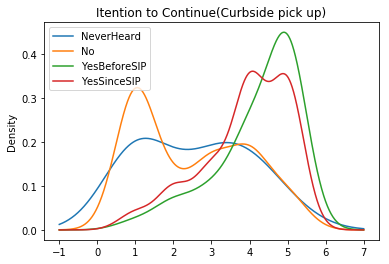

In [112]:
display(sacog['Tried-CurbsidePickup'].value_counts())
sacog[~sacog['Tried-CurbsidePickup'].isin(['No Response'])].groupby('Tried-CurbsidePickup')['DoInStage23-CurbsidePickup'].plot(kind='density', legend=True, title = "Intention to Continue(Curbside pick-up)")

In [ ]:
sacog[~sacog['Tried-CurbsidePickup'].isin(['No Response'])].groupby('Tried-CurbsidePickup')['DoInStage23-CurbsidePickup'].plot(kind='density', legend=True, title = "Intention to Continue(Curbside pick-up)")

No              188
NeverHeard       93
YesBeforeSIP     27
YesSinceSIP      17
No Response       2
Name: Tried-CrowdSourcedDelivery, dtype: int64

Tried-CrowdSourcedDelivery
NeverHeard      AxesSubplot(0.125,0.125;0.775x0.755)
No              AxesSubplot(0.125,0.125;0.775x0.755)
YesBeforeSIP    AxesSubplot(0.125,0.125;0.775x0.755)
YesSinceSIP     AxesSubplot(0.125,0.125;0.775x0.755)
Name: DoInStage23-CrowdSourcedDelivery, dtype: object

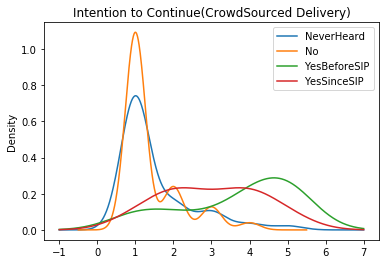

In [128]:
display(sacog['Tried-CrowdSourcedDelivery'].value_counts())
sacog[~sacog['Tried-CrowdSourcedDelivery'].isin(['No Response'])].groupby('Tried-CrowdSourcedDelivery')['DoInStage23-CrowdSourcedDelivery'].plot(kind='density', legend=True, title = "Intention to Continue(CrowdSourced Delivery)")

No              226
YesSinceSIP      43
NeverHeard       36
YesBeforeSIP     19
No Response       3
Name: Tried-ContactlessCurbside, dtype: int64

 1       130
 3        55
 2        51
 5        44
 4        43
-9998      4
Name: DoInStage23-ContactlessCurbside, dtype: int64

Tried-ContactlessCurbside
NeverHeard      AxesSubplot(0.125,0.125;0.775x0.755)
No              AxesSubplot(0.125,0.125;0.775x0.755)
YesBeforeSIP    AxesSubplot(0.125,0.125;0.775x0.755)
YesSinceSIP     AxesSubplot(0.125,0.125;0.775x0.755)
Name: DoInStage23-ContactlessCurbside, dtype: object

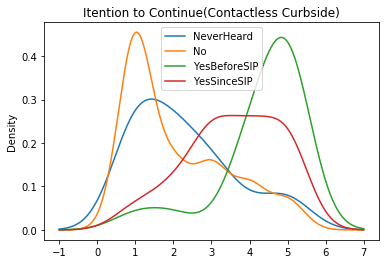

In [110]:
display(sacog['Tried-ContactlessCurbside'].value_counts())
display(sacog['DoInStage23-ContactlessCurbside'].value_counts())
sacog[~((sacog['Tried-ContactlessCurbside'].isin(['No Response'])) | (sacog['DoInStage23-ContactlessCurbside'].isin([-9998])))].groupby('Tried-ContactlessCurbside')['DoInStage23-ContactlessCurbside'].plot(kind='density', legend=True,  title = "Intention to Continue(Contactless Curbside)")

No              115
YesSinceSIP     101
YesBeforeSIP     84
NeverHeard       23
No Response       4
Name: Tried-ContactlessDoor, dtype: int64

 5       103
 1        78
 4        73
 3        50
 2        19
-9998      4
Name: DoInStage23-ContactlessDoor, dtype: int64

Tried-ContactlessDoor
NeverHeard      AxesSubplot(0.125,0.125;0.775x0.755)
No              AxesSubplot(0.125,0.125;0.775x0.755)
YesBeforeSIP    AxesSubplot(0.125,0.125;0.775x0.755)
YesSinceSIP     AxesSubplot(0.125,0.125;0.775x0.755)
Name: DoInStage23-ContactlessDoor, dtype: object

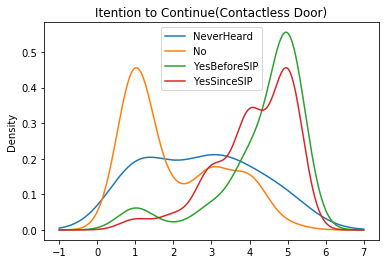

In [108]:
display(sacog['Tried-ContactlessDoor'].value_counts())
display(sacog['DoInStage23-ContactlessDoor'].value_counts())
sacog[~((sacog['Tried-ContactlessDoor'].isin(['No Response'])) | (sacog['DoInStage23-ContactlessDoor'].isin([-9998])))].groupby('Tried-ContactlessDoor')['DoInStage23-ContactlessDoor'].plot(kind='density', legend=True,  title = "Intention to Continue(Contactless Door)")

No              217
YesBeforeSIP     90
YesSinceSIP      10
NeverHeard        7
No Response       3
Name: Tried-LockerPickup, dtype: int64

 1       142
 2        57
 3        56
 4        37
 5        32
-9998      3
Name: DoInStage23-LockerPickup, dtype: int64

Tried-LockerPickup
NeverHeard      AxesSubplot(0.125,0.125;0.775x0.755)
No              AxesSubplot(0.125,0.125;0.775x0.755)
YesBeforeSIP    AxesSubplot(0.125,0.125;0.775x0.755)
YesSinceSIP     AxesSubplot(0.125,0.125;0.775x0.755)
Name: DoInStage23-LockerPickup, dtype: object

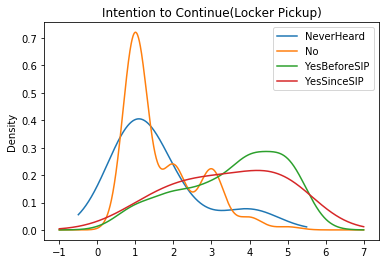

In [117]:
display(sacog['Tried-LockerPickup'].value_counts())
display(sacog['DoInStage23-LockerPickup'].value_counts())
sacog[~((sacog['Tried-LockerPickup'].isin(['No Response'])) | (sacog['DoInStage23-LockerPickup'].isin([-9998])))].groupby('Tried-LockerPickup')['DoInStage23-LockerPickup'].plot(kind='density', legend=True, title = "Intention to Continue(Locker Pickup)")

#### There are not many people tried bundling, contactless driveless or Drone so it's hard to infer from the distribution

No              184
NeverHeard      135
YesSinceSIP       4
YesBeforeSIP      2
No Response       2
Name: Tried-BundlingOnlineGroceries, dtype: int64

 1       240
 2        55
 3        20
 4         7
 5         3
-9998      2
Name: DoInStage23-BundlingOnlineGroceries, dtype: int64

Tried-BundlingOnlineGroceries
NeverHeard      AxesSubplot(0.125,0.125;0.775x0.755)
No              AxesSubplot(0.125,0.125;0.775x0.755)
YesBeforeSIP    AxesSubplot(0.125,0.125;0.775x0.755)
YesSinceSIP     AxesSubplot(0.125,0.125;0.775x0.755)
Name: DoInStage23-BundlingOnlineGroceries, dtype: object

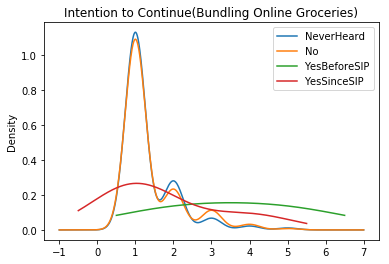

In [120]:
display(sacog['Tried-ContactlessDriverless'].value_counts())
display(sacog['DoInStage23-ContactlessDriverless'].value_counts())
sacog[~((sacog['Tried-ContactlessDriverless'].isin(['No Response'])) | (sacog['DoInStage23-ContactlessDriverless'].isin([-9998])))].groupby('Tried-ContactlessDriverless')['DoInStage23-ContactlessDriverless'].plot(kind='density', legend=True, title = "Intention to Continue(Contactless Driverless)")

display(sacog['Tried-BundlingOnlineGroceries'].value_counts())
display(sacog['DoInStage23-BundlingOnlineGroceries'].value_counts())
sacog[~((sacog['Tried-BundlingOnlineGroceries'].isin(['No Response'])) | (sacog['DoInStage23-BundlingOnlineGroceries'].isin([-9998])))].groupby('Tried-BundlingOnlineGroceries')['DoInStage23-BundlingOnlineGroceries'].plot(kind='density', legend=True, title = "Intention to Continue(Bundling Online Groceries)")